# Dataprocessing With Asari (Standalone)

Asari is a free and open-source tool for processing MS data. In this notebook we will use Asari from the CLI (via the notebook) to analyze a representative LC-MS dataset and visualize some of the data. 

In [1]:
# lets verify all needed packages are installed

!pip3 install asari-metabolomics

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# now lets run asari on our test dataset. 
# the arguments to asari do the following:
#   -i specifies the input directory
#   -o specifies where to save the output
#   -m indicates the ionization mode, either pos or neg
#   -j is the name of the results directory so we can find it later
#   --pickle true and --database_mode ondisk are optional parameters that will keep intermediate data structures for visualization alter.

!asari process -i ../../Datasets/MT02Dataset/ -o ../../Results/ -m pos -j MT02_results --pickle true --database_mode ondisk

# After you exeucte this block, you should see the output from asari.



~~~~~~~ Hello from Asari (1.13.1) ~~~~~~~~~

Working on ~~ ../../Datasets/MT02Dataset/ ~~ 


[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
Extracted batch14_MT_20210808_005.mzML to 2992 mass tracks.
[Warning] Not index found and build_index_from_scratch is False
Extracted batch12_MT_20210806_005_20210806121327.mzML to 2928 mass tracks.
[Warning] Not index found and build_index_from_scratch is False
Extracted batch13_MT_20210807_005.mzML to 3199 mass tracks.
[Warning] Not index found and build_index_from_scratch is False
Extrac

# Exploring Asari Outputs

After running the previous block, you have successfully pre-processed the LC-MS data into a feature table and other outputs. Lets look at these results more closely.

In [4]:
# find the outputs from the asari run

import os 
asari_subdir = None
for x in os.listdir("../../"):
    if x.startswith("Results_MT02_results"): # here we are using the name specified earlier
        asari_subdir = os.path.join(os.path.abspath("../../"), x)
preferred_table = os.path.join(asari_subdir, "preferred_Feature_table.tsv") # this is the high-quality feature table
annotation_table = os.path.join(asari_subdir, "Feature_annotation.tsv") # this is annotations generated by asari based on the serum subset of the HMDBv4   


# Examining the Feature Table

A feature is an aligned peak across all the samples in the experiment. How the feature intensity is calculated is shown in the next notebook.

More features is not always better as many features are low quality (poor quantification, poor peak shape etc.). The recommended feature table to use in Asari is therefore the preferred table, which is a summary of high quality features only.

In [5]:
# Lets count how many samples and how many features were returned.

import pandas as pd

# use pandas to read the feature table, note that it is .tsv, so we need to specify the delimiter character.
ft = pd.read_csv(preferred_table, sep="\t")

# the first 11 columns are properties of the features, the remaining columns are per-sample intensities
print("Num_Samples = ", ft.shape[1]-11)

# the first row is the header, but the rest represent a feature.
print("Num_Features = ", ft.shape[0]-1)

Num_Samples =  8
Num_Features =  5950


In [6]:
# this shows the top rows of the feature table
ft.head()

,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,batch14_MT_20210808_087,batch11_MT_20210805_005,batch12_MT_20210806_005_20210806121327,batch13_MT_20210807_005,batch14_MT_20210808_005,batch14_MT_20210808_089,batch14_MT_20210808_179,batch14_MT_20210808_181
0,F1,83.0603,170.72,168.80,175.35,0,68233281,1.0,0.89,5,8,11999810,13963539,13572898,12448054,11857819,11774404,10883477,10342329
1,F3,84.0444,173.81,169.18,178.44,1,223323080,1.0,0.90,54,8,5537018,57663278,52570450,47681862,43934538,5592467,5494101,5333602
2,F4,84.0444,196.35,192.16,200.92,1,168822841,1.0,0.85,55,8,31505539,8896918,8344411,10567488,20144492,30488967,30534878,28300374
3,F5,84.0808,129.52,126.09,134.14,2,33239848,1.0,0.92,32,8,3605623,3876308,4956308,5571413,5738826,3562333,3256920,3194580
4,F7,84.0808,228.41,223.91,232.91,2,101063770,1.0,0.93,34,8,5760663,21326425,20249296,18505246,18044634,6736338,6028273,6259698


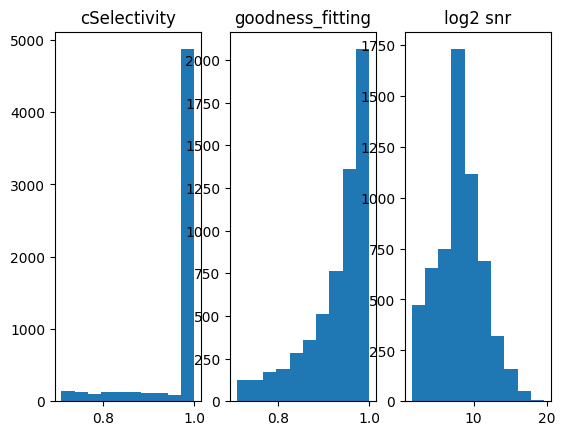

In [15]:
# the preferred feature table contains only high-quality features. we can see this by looking at the distributions of cSelectivity, goodness of fit, and SNR.

import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(ft['cSelectivity'])
ax1.set_title("cSelectivity")
ax2.hist(ft['goodness_fitting'])
ax2.set_title("goodness_fitting")
ax3.hist(np.log2(ft['snr']))
ax3.set_title("log2 snr")
plt.show()

In [ ]:
# lets look at the default annotation returned by Asari

annots = pd.read_csv(annotation_table, sep="\t")
annots.head()

In [ ]:
# now you can process data using Asari! 
# in the next modules we will work with annotation and visualization of the results, but with slight modification this notebook can be used to process your datasets too.